In [1]:
!pip install  datasets transformers evaluate accelerate -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 35.1 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login

notebook_login()

## Types of Segmentation
Semantic segmentation assigns a label or class to every single pixel in an image. Let’s take a look at a semantic segmentation model output. It will assign the same class to every instance of an object it comes across in an image, for example, all cats will be labeled as “cat” instead of “cat-1”, “cat-2”. We can use transformers’ image segmentation pipeline to quickly infer a semantic segmentation model. Let’s take a look at the example image.

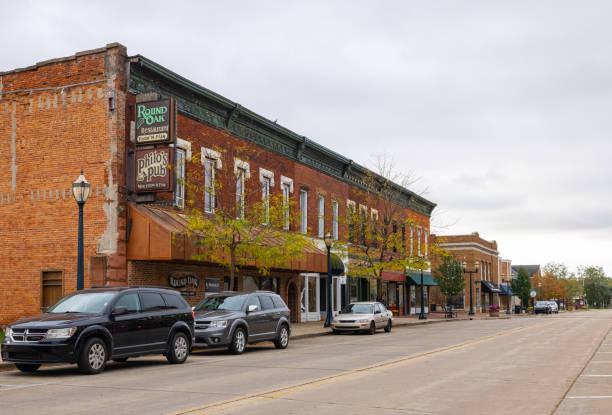

In [3]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [4]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

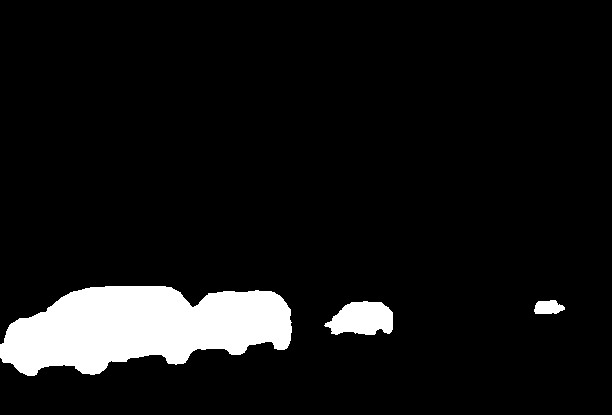

In [5]:
results[-1]["mask"]

In instance segmentation, the goal is not to classify every pixel, but to predict a mask for every instance of an object in a given image. It works very similar to object detection, where there is a bounding box for every instance, there’s a segmentation mask instead

In [8]:
# instance_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-instance")
# results = instance_segmentation(Image.open(image))
# results

In [ ]:
# results[2]["mask"]

Panoptic segmentation combines semantic segmentation and instance segmentation, where every pixel is classified into a class and an instance of that class, and there are multiple masks for each instance of a class.

In [10]:
!transformers-cli env

2024-04-25 02:49:06.163075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 02:49:06.163144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 02:49:06.164924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 02:49:08.255740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
2024-04-25 02:49:12.135072: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH en

### DPT Architecture’s Toolbox
1. DPTs come in different types, each with its “encoder” and “decoder” layers. Let’s look at two popular ones here:

2. DPT-Swin-Transformer: Think of a mega transformer with 10 encoder layers and 5 decoder layers. It’s great at understanding relationships between elements at levels in the image.
DPT-ResNet: This one’s like a clever detective with 18 encoder layers and 5 decoder layers. It excels at spotting connections between faraway objects while keeping the image’s spatial structure intact.

In [17]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/20210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3352 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
ds = ds.train_test_split(test_size=0.2)
train_ds = ds["train"]
test_ds = ds["test"]

The next step from here will be to apply some transformation to the image.

In [19]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=664x512>,
 'annotation': <PIL.PngImagePlugin.PngImageFile image mode=L size=664x512>,
 'scene_category': 871}

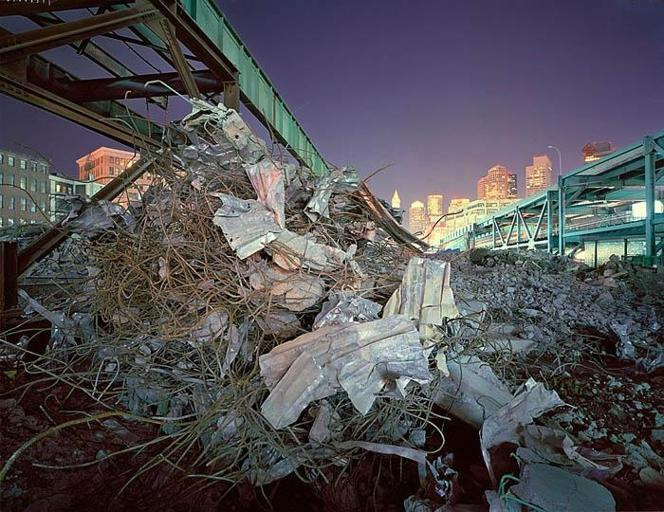

In [20]:
train_ds[0]["image"]

You’ll also want to create a dictionary that maps a label id to a label class which will be useful when you set up the model later. Download the mappings from the Hub and create the id2label and label2id dictionaries:

In [21]:
import json
from huggingface_hub import cached_download, hf_hub_url

repo_id = "huggingface/label-files"
filename = "ade20k-id2label.json"
id2label = json.load(open(cached_download(hf_hub_url(repo_id, filename, repo_type="dataset")), "r"))
id2label = {int(k): v for k, v in id2label.items()}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:669: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


ade20k-id2label.json:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

## Preprocess
The next step is to load a SegFormer image processor to prepare the images and annotations for the model. Some datasets, like this one, use the zero-index as the background class. However, the background class isn’t actually included in the 150 classes, so you’ll need to set reduce_labels=True to subtract one from all the labels. The zero-index is replaced by 255 so it’s ignored by SegFormer’s loss function:

In [23]:
from transformers import AutoImageProcessor

checkpoint = "nvidia/mit-b0"
image_processor = AutoImageProcessor.from_pretrained(checkpoint, reduce_labels=True)

preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


It is common to apply some data augmentations to an image dataset to make a model more robust against overfitting. In this guide, you’ll use the ColorJitter function from torchvision to randomly change the color properties of an image, but you can also use any image library you like.

In [24]:
from torchvision.transforms import ColorJitter

jitter = ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25, hue=0.1)

In [25]:
def train_transforms(example_batch):
    images = [jitter(x) for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs


def val_transforms(example_batch):
    images = [x for x in example_batch["image"]]
    labels = [x for x in example_batch["annotation"]]
    inputs = image_processor(images, labels)
    return inputs

In [26]:
train_ds.set_transform(train_transforms)
test_ds.set_transform(val_transforms)

In [27]:
import evaluate

metric = evaluate.load("mean_iou")

In [28]:
import numpy as np
import torch
from torch import nn

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = nn.functional.interpolate(
            logits_tensor,
            size=labels.shape[-2:],
            mode="bilinear",
            align_corners=False,
        ).argmax(dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()
        metrics = metric.compute(
            predictions=pred_labels,
            references=labels,
            num_labels=num_labels,
            ignore_index=255,
            reduce_labels=False,
        )
        for key, value in metrics.items():
            if isinstance(value, np.ndarray):
                metrics[key] = value.tolist()
        return metrics

In [30]:
from transformers import AutoModelForSemanticSegmentation, TrainingArguments, Trainer

model = AutoModelForSemanticSegmentation.from_pretrained(checkpoint, id2label=id2label, label2id=label2id)

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
training_args = TrainingArguments(
    output_dir="segformer-b0-scene-parse-150",
    learning_rate=6e-5,
    num_train_epochs=50,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=20,
    eval_steps=20,
    logging_steps=1,
    eval_accumulation_steps=5,
    remove_unused_columns=False,
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

trainer.train()

Step,Training Loss,Validation Loss,Mean Iou,Mean Accuracy,Overall Accuracy,Per Category Iou,Per Category Accuracy
20,4.653200,4.864703,0.012717,0.049253,0.187477,"[0.1625591809984069, 0.16132628081832487, 0.5430089163090892, 0.1219610966826421, 0.18326901431098247, 0.03159069073122702, 0.04098912388847557, 0.0, 0.07023641021820738, 0.0, 0.01398402072986396, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.057223663505294946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, nan, 0.0]","[0.3279196018223052, 0.3712627258460424, 0.6718746560657889, 0.18623227290149483, 0.1977059346473254, 0.03506012258044617, 0.10337741243745532, nan, 0.2852388719351784, nan, 0.016152203843007362, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, 0.12004550219704235, nan, 0.0, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0]"
40,4.497300,4.479636,0.028255,0.097225,0.343004,"[0.25531523404769274, 0.41525612359493724, 0.6384080442665079, 0.1085851190329171, 0.70071264764629, 0.06532766855263754, 0.0475537742784642, 0.0, 0.03880014848550327, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0006365289685632632, 0.0, 0.0, nan, 0.04629446096244907, nan, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, nan, 0.0, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, nan, nan, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0]","[0.6787961346258052, 0.825791718643113, 0.8781999639006652, 0.15727098505174397, 0.9242177844272426, 0.06985146704383727, 0.895818441744103, nan, 0.0921156476902031, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, 0.0006365289685632632, nan, nan, nan, 0.046885106952468045, nan, 0.0, 0.0, nan, nan, 0.0, nan, 0.0, nan, nan, 0.0, 0.0, nan, 0.0, nan, 0.0, 0.0, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 0.0, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, 0.0, nan, nan, nan, nan, 0.0]"
60,4.032100,4.009995,0.038961,0.101406,0.373124,"[0.25985156009162397, 0.48549022518915996, 0.5979323042062031, 0.2246380764321482, 0.7105007897266858, 0

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:260: RuntimeWarning: invalid value encountered in divide
  acc = total_area_intersect / total_area_label
Trainer is attempting to log a value of "[0.1625591809984069, 0.16132628081832487, 0.5430089163090892, 0.1219610966826421, 0.18326901431098247, 0.03159069073122702, 0.04098912388847557, 0.0, 0.07023641021820738, 0.

TrainOutput(global_step=1000, training_loss=2.247577480316162, metrics={'train_runtime': 443.2252, 'train_samples_per_second': 4.512, 'train_steps_per_second': 2.256, 'total_flos': 3.5414863773696e+16, 'train_loss': 2.247577480316162, 'epoch': 50.0})

In [32]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/Andyrasika/segformer-b0-scene-parse-150/commit/60adc229968ca6c076b36aa86a6f187dc4797554', commit_message='End of training', commit_description='', oid='60adc229968ca6c076b36aa86a6f187dc4797554', pr_url=None, pr_revision=None, pr_num=None)

## Inference
Great, now that you’ve finetuned a model, you can use it for inference!

Reload the dataset and load an image for inference.

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for scene_parse_150 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/scene_parse_150
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


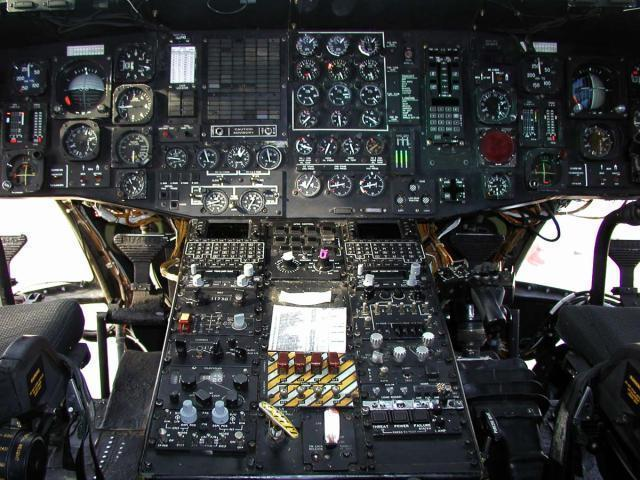

In [33]:
from datasets import load_dataset

ds = load_dataset("scene_parse_150", split="train[:50]")
ds = ds.train_test_split(test_size=0.2)
test_ds = ds["test"]
image = ds["test"][0]["image"]
image

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # use GPU if available, otherwise use a CPU
encoding = image_processor(image, return_tensors="pt")
pixel_values = encoding.pixel_values.to(device)

In [35]:
outputs = model(pixel_values=pixel_values)
logits = outputs.logits.cpu()

In [36]:
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]

In [37]:
def ade_palette():
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])

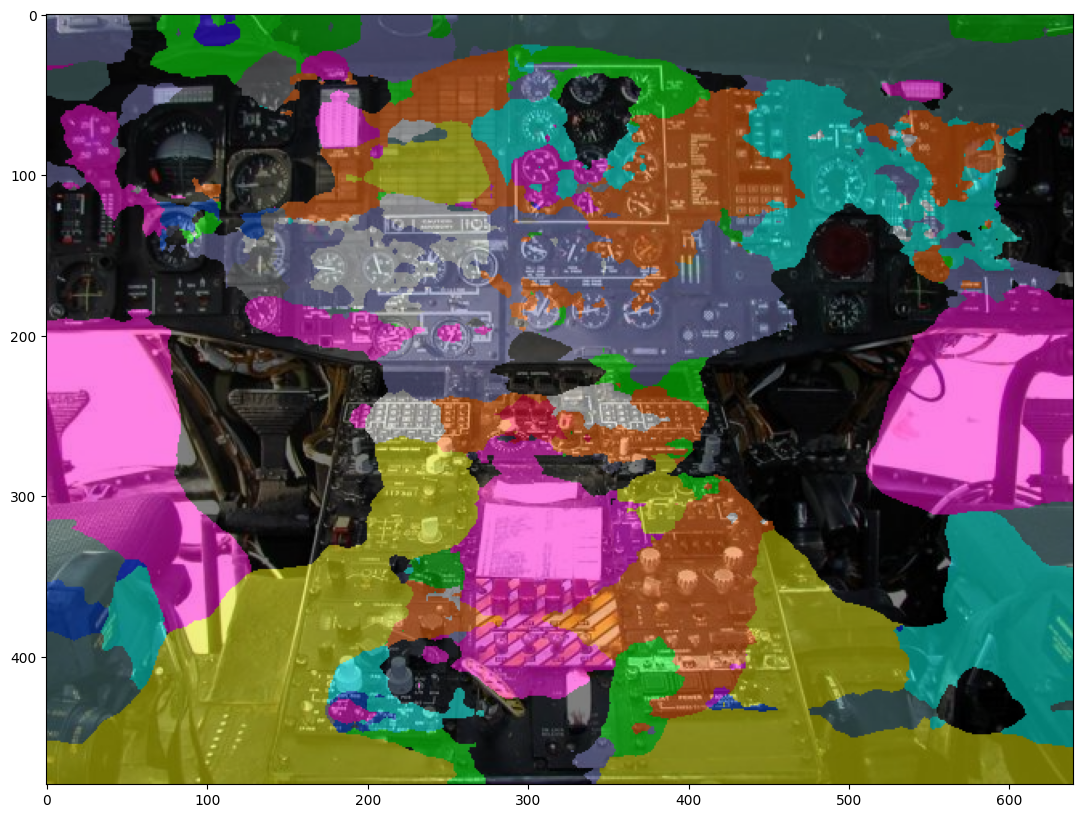

In [38]:
import matplotlib.pyplot as plt
import numpy as np

color_seg = np.zeros((pred_seg.shape[0], pred_seg.shape[1], 3), dtype=np.uint8)
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[pred_seg == label, :] = color
color_seg = color_seg[..., ::-1]  # convert to BGR

img = np.array(image) * 0.5 + color_seg * 0.5  # plot the image with the segmentation map
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()